# Import Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

# Obtain Data

Read features data csv into pandas

In [12]:
df = pd.read_csv('Excel/data.csv')
df.head()

,Unnamed: 0,Brand,Model,Year,Overall Score,Road Test Score,Reliability Score,Owner Satisfact Score,Warranty,Drivetrain Warranty,...,Height,Wheelbase,Turning Circle,Curb Weight,Max Load,Towing Capacity,Driving Satisfaction,Comfort Satisfaction,Value Satisfaction,Styling Satisfaction
0,0,tesla,model-s,2013,NaN,NaN,3,5,NaN,NaN,...,57,117,41,4695,920,NaN,98.0,84.0,68.0,10.0
1,0,ford,fiesta,2013,NaN,NaN,N,1,NaN,NaN,...,58,98,36,2665,825,NaN,NaN,NaN,NaN,NaN
2,0,chrysler,town-country,2014,NaN,NaN,2,3,NaN,NaN,...,68,121,42,4685,1150,3600.0,65.0,53.0,61.0,56.0
3,0,honda,passport,2019,NaN,NaN,1,4,NaN,NaN,...,72,111,40,4170,950,5000.0,79.0,81.0,60.0,78.0
4,0,subaru,ascent,2019,NaN,NaN,3,4,NaN,NaN,...,72,114,40,4550,1160,5000.0,84.0,85.0,73.0,83.0


Filter features df to only include models from 2018

In [13]:
df = df[df['Year'] == 2018]
df.reset_index(inplace=True, drop=True)
df.head()

,Unnamed: 0,Brand,Model,Year,Overall Score,Road Test Score,Reliability Score,Owner Satisfact Score,Warranty,Drivetrain Warranty,...,Height,Wheelbase,Turning Circle,Curb Weight,Max Load,Towing Capacity,Driving Satisfaction,Comfort Satisfaction,Value Satisfaction,Styling Satisfaction
0,0,ford,flex,2018,NaN,NaN,5,4,NaN,NaN,...,68,118,43,4820,1160,4500.0,90.0,81.0,74.0,84.0
1,0,lexus,ls,2018,NaN,NaN,1,2,NaN,NaN,...,58,123,41,5170,870,NaN,68.0,79.0,46.0,84.0
2,0,jeep,compass,2018,NaN,NaN,1,1,NaN,NaN,...,65,104,38,3525,860,2000.0,41.0,51.0,51.0,72.0
3,0,lexus,es,2018,NaN,NaN,5,4,NaN,NaN,...,57,111,40,3575,905,NaN,83.0,84.0,67.0,81.0
4,0,jeep,renegade,2018,NaN,NaN,1,1,NaN,NaN,...,66,101,37,3360,985,2000.0,49.0,41.0,46.0,67.0


Read sales data into pandas

In [14]:
sales_df = pd.read_excel('Excel/sales.xls')
sales_df = sales_df.iloc[4:, 0:2]
sales_df.columns = ['Model', 'Sales']
sales_df.head()

,Model,Sales
4,2-series,9208
5,3-series,44578
6,5-series,43937
7,7-series,8271
8,i3,6117


Merge sales and features dfs together

In [15]:
df = pd.merge(df, sales_df, how='inner', left_on='Model', right_on='Model')
print(df.shape)
df.head()

(165, 91)


,Unnamed: 0,Brand,Model,Year,Overall Score,Road Test Score,Reliability Score,Owner Satisfact Score,Warranty,Drivetrain Warranty,...,Wheelbase,Turning Circle,Curb Weight,Max Load,Towing Capacity,Driving Satisfaction,Comfort Satisfaction,Value Satisfaction,Styling Satisfaction,Sales
0,0,lexus,ls,2018,NaN,NaN,1,2,NaN,NaN,...,123,41,5170,870,NaN,68.0,79.0,46.0,84.0,22927
1,0,lexus,ls,2018,NaN,NaN,1,2,NaN,NaN,...,123,41,5170,870,NaN,68.0,79.0,46.0,84.0,9302
2,0,jeep,compass,2018,NaN,NaN,1,1,NaN,NaN,...,104,38,3525,860,2000.0,41.0,51.0,51.0,72.0,171167
3,0,lexus,es,2018,NaN,NaN,5,4,NaN,NaN,...,111,40,3575,905,NaN,83.0,84.0,67.0,81.0,48484
4,0,jeep,renegade,2018,NaN,NaN,1,1,NaN,NaN,...,101,37,3360,985,2000.0,49.0,41.0,46.0,67.0,97062


# Scrub Data

Perform df.info() to understand scrubbing needed

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 164
Data columns (total 91 columns):
Unnamed: 0                   165 non-null int64
Brand                        165 non-null object
Model                        165 non-null object
Year                         165 non-null int64
Overall Score                0 non-null float64
Road Test Score              0 non-null float64
Reliability Score            165 non-null object
Owner Satisfact Score        165 non-null object
Warranty                     0 non-null object
Drivetrain Warranty          0 non-null object
Corrosion Waranty            0 non-null object
Roadside Aid                 0 non-null object
Free Maintenance             0 non-null object
Acceleration Score           165 non-null int64
Zero To Sixty                165 non-null float64
Transmission Score           165 non-null int64
Fuel Economy Score           165 non-null int64
Overall Fuel Economy         165 non-null float64
City Fuel Economy           

Drop df columns not used in modeling

In [17]:
df.drop(columns=['Unnamed: 0', 'Brand', 'Overall Score', 'Road Test Score', 'Model', 'Year', 'Warranty', 
                 'Drivetrain Warranty', 'Corrosion Waranty', 'Roadside Aid', 'Free Maintenance', 'Fuel Type', 
                  'Seats', 'Side Airbags', 'Head Airbags'], inplace=True)
df.head()

,Reliability Score,Owner Satisfact Score,Acceleration Score,Zero To Sixty,Transmission Score,Fuel Economy Score,Overall Fuel Economy,City Fuel Economy,Highway Fuel Economy,Annual Fuel Cost,...,Wheelbase,Turning Circle,Curb Weight,Max Load,Towing Capacity,Driving Satisfaction,Comfort Satisfaction,Value Satisfaction,Styling Satisfaction,Sales
0,1,2,5,6.0,5,2,20.0,12.0,32.0,"1,710",...,123,41,5170,870,NaN,68.0,79.0,46.0,84.0,22927
1,1,2,5,6.0,5,2,20.0,12.0,32.0,"1,710",...,123,41,5170,870,NaN,68.0,79.0,46.0,84.0,9302
2,1,1,3,9.8,3,3,24.0,16.0,35.0,"1,190",...,104,38,3525,860,2000.0,41.0,51.0,51.0,72.0,171167
3,5,4,4,6.7,5,4,25.0,17.0,35.0,"1,155",...,111,40,3575,905,NaN,83.0,84.0,67.0,81.0,48484
4,1,1,3,9.9,3,3,24.0,16.0,32.0,"1,225",...,101,37,3360,985,2000.0,49.0,41.0,46.0,67.0,97062


Update data types for all columns to int or float

In [18]:
df['Reliability Score'] = df['Reliability Score'].replace({'N': np.nan})
df['Reliability Score'] = df['Reliability Score'].astype('float')


df['Owner Satisfact Score'] = df['Owner Satisfact Score'].astype('float')

df['Headlights'] = df['Headlights'].astype('float')

df['Annual Fuel Cost'] = df['Annual Fuel Cost'].apply(lambda x: x.replace(',', ''))
fuel_replace_dict = {'A': np.nan}
df['Annual Fuel Cost'] = df['Annual Fuel Cost'].replace(fuel_replace_dict)
df['Annual Fuel Cost'] = df['Annual Fuel Cost'].astype('float')

seat_replace_dict = {'N': 0}
df['Rear Seat Score'] = df['Rear Seat Score'].replace(seat_replace_dict)
df['Rear Seat Score'] = df['Rear Seat Score'].astype('int')

df['Third Row Score'] = df['Third Row Score'].replace(seat_replace_dict)
df['Third Row Score'] = df['Third Row Score'].astype('int')

df['Rear Access'] = df['Rear Access'].replace(seat_replace_dict)
df['Rear Access'] = df['Rear Access'].astype('int')

df['Third Access'] = df['Third Access'].replace(seat_replace_dict)
df['Third Access'] = df['Third Access'].astype('int')

safety_cols = df.columns[44:57]
safety_replace_dict = {'Standard':1, 'Optional':0, 'Available':0, 'Not offered':0, 'Varies':0}
for col in safety_cols:
    df[col] = df[col].replace(safety_replace_dict)
    df[col] = df[col].astype('float')

crash_replace_dict = {'Poor': 1, 'Marginal':2, 'Acceptable':3, 'Good':4}
for col in df.columns[57:63]:
    df[col] = df[col].replace(crash_replace_dict)
    df[col] = df[col].astype('float')    

df['Sales'] = df['Sales'].astype('int')
    
df.head()

,Reliability Score,Owner Satisfact Score,Acceleration Score,Zero To Sixty,Transmission Score,Fuel Economy Score,Overall Fuel Economy,City Fuel Economy,Highway Fuel Economy,Annual Fuel Cost,...,Wheelbase,Turning Circle,Curb Weight,Max Load,Towing Capacity,Driving Satisfaction,Comfort Satisfaction,Value Satisfaction,Styling Satisfaction,Sales
0,1.0,2.0,5,6.0,5,2,20.0,12.0,32.0,1710.0,...,123,41,5170,870,NaN,68.0,79.0,46.0,84.0,22927
1,1.0,2.0,5,6.0,5,2,20.0,12.0,32.0,1710.0,...,123,41,5170,870,NaN,68.0,79.0,46.0,84.0,9302
2,1.0,1.0,3,9.8,3,3,24.0,16.0,35.0,1190.0,...,104,38,3525,860,2000.0,41.0,51.0,51.0,72.0,171167
3,5.0,4.0,4,6.7,5,4,25.0,17.0,35.0,1155.0,...,111,40,3575,905,NaN,83.0,84.0,67.0,81.0,48484
4,1.0,1.0,3,9.9,3,3,24.0,16.0,32.0,1225.0,...,101,37,3360,985,2000.0,49.0,41.0,46.0,67.0,97062


Manually replace missing values

In [19]:
df['Annual Fuel Cost'] = df['Annual Fuel Cost'].replace({np.nan: 200})

for col in df.columns[31:34]:
          df[col] = df[col].replace({np.nan: 0})
        
for col in df.columns[35:38]:
          df[col] = df[col].replace({np.nan: 0})
                       
df['Fuel Capacity'] = df['Fuel Capacity'].fillna(value=df['Fuel Capacity'].mean())   

for col in df.columns[44:57]:
          df[col] = df[col].replace({np.nan: 0})  
            
df.drop(columns=['IIHS Passenger Overlap'], inplace=True)
                                                            
df['Towing Capacity'] = df['Towing Capacity'].replace({np.nan: 0})

df.head()

,Reliability Score,Owner Satisfact Score,Acceleration Score,Zero To Sixty,Transmission Score,Fuel Economy Score,Overall Fuel Economy,City Fuel Economy,Highway Fuel Economy,Annual Fuel Cost,...,Wheelbase,Turning Circle,Curb Weight,Max Load,Towing Capacity,Driving Satisfaction,Comfort Satisfaction,Value Satisfaction,Styling Satisfaction,Sales
0,1.0,2.0,5,6.0,5,2,20.0,12.0,32.0,1710.0,...,123,41,5170,870,0.0,68.0,79.0,46.0,84.0,22927
1,1.0,2.0,5,6.0,5,2,20.0,12.0,32.0,1710.0,...,123,41,5170,870,0.0,68.0,79.0,46.0,84.0,9302
2,1.0,1.0,3,9.8,3,3,24.0,16.0,35.0,1190.0,...,104,38,3525,860,2000.0,41.0,51.0,51.0,72.0,171167
3,5.0,4.0,4,6.7,5,4,25.0,17.0,35.0,1155.0,...,111,40,3575,905,0.0,83.0,84.0,67.0,81.0,48484
4,1.0,1.0,3,9.9,3,3,24.0,16.0,32.0,1225.0,...,101,37,3360,985,2000.0,49.0,41.0,46.0,67.0,97062


Replace remaining missing values with iterative imputer

In [20]:
ii = IterativeImputer(random_state=7)
imputed_values = ii.fit_transform(df.drop(columns='Sales'))
scrubbed_df = pd.DataFrame(imputed_values, columns=df.columns[:-1])
scrubbed_df['Sales'] = df['Sales']
scrubbed_df.head()

,Reliability Score,Owner Satisfact Score,Acceleration Score,Zero To Sixty,Transmission Score,Fuel Economy Score,Overall Fuel Economy,City Fuel Economy,Highway Fuel Economy,Annual Fuel Cost,...,Wheelbase,Turning Circle,Curb Weight,Max Load,Towing Capacity,Driving Satisfaction,Comfort Satisfaction,Value Satisfaction,Styling Satisfaction,Sales
0,1.0,2.0,5.0,6.0,5.0,2.0,20.0,12.0,32.0,1710.0,...,123.0,41.0,5170.0,870.0,0.0,68.0,79.0,46.0,84.0,22927
1,1.0,2.0,5.0,6.0,5.0,2.0,20.0,12.0,32.0,1710.0,...,123.0,41.0,5170.0,870.0,0.0,68.0,79.0,46.0,84.0,9302
2,1.0,1.0,3.0,9.8,3.0,3.0,24.0,16.0,35.0,1190.0,...,104.0,38.0,3525.0,860.0,2000.0,41.0,51.0,51.0,72.0,171167
3,5.0,4.0,4.0,6.7,5.0,4.0,25.0,17.0,35.0,1155.0,...,111.0,40.0,3575.0,905.0,0.0,83.0,84.0,67.0,81.0,48484
4,1.0,1.0,3.0,9.9,3.0,3.0,24.0,16.0,32.0,1225.0,...,101.0,37.0,3360.0,985.0,2000.0,49.0,41.0,46.0,67.0,97062


In [21]:
scrubbed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 75 columns):
Reliability Score            165 non-null float64
Owner Satisfact Score        165 non-null float64
Acceleration Score           165 non-null float64
Zero To Sixty                165 non-null float64
Transmission Score           165 non-null float64
Fuel Economy Score           165 non-null float64
Overall Fuel Economy         165 non-null float64
City Fuel Economy            165 non-null float64
Highway Fuel Economy         165 non-null float64
Annual Fuel Cost             165 non-null float64
Braking Score                165 non-null float64
Emergency Handling Score     165 non-null float64
Ride Score                   165 non-null float64
Noise Score                  165 non-null float64
Front Seat Score             165 non-null float64
Rear Seat Score              165 non-null float64
Interior Finish Score        165 non-null float64
Trunk Score                  165 non-null flo

Determine correlated features with vif greater than 5 and drop from scrubbed df

In [22]:
vif_df = add_constant(scrubbed_df.drop(columns='Sales'))
drop_vif = 11
drop_features = []

while 1:
    vif_results = []
    for index, col in enumerate(vif_df.columns):
        vif_score = variance_inflation_factor(vif_df.values, index)
        vif_results.append([col, vif_score])
    vif_results_df = pd.DataFrame(vif_results, columns=['Feature', 'VIF Score']).sort_values(by='VIF Score', ascending=False)
    drop_feature = vif_results_df['Feature'].iloc[0]
    drop_vif = vif_results_df['VIF Score'].iloc[0]
    if drop_vif < 5:
        break
    vif_df.drop(columns=drop_feature, inplace=True)
    drop_features.append([drop_feature, drop_vif])
    
drop_features_df = pd.DataFrame(drop_features, columns = ['Feature', 'VIF Score'])
scrubbed_df.drop(columns=drop_features_df['Feature'].values, inplace=True)
drop_features_df

/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Feature,VIF Score
0,Overall Fuel Economy,1607.466845
1,Quarter Mile,700.955136
2,Highway Fuel Economy,105.463421
3,Zero To Sixty,100.202402
4,Curb Weight,32.316693
5,Annual Fuel Cost,30.146465
6,Length,29.433347
7,Third Leg Room,25.243359
8,Rear Leg Room,20.058491
9,City Automatic Braking,19.019099


In [23]:
scrubbed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 43 columns):
Reliability Score            165 non-null float64
Owner Satisfact Score        165 non-null float64
Acceleration Score           165 non-null float64
Transmission Score           165 non-null float64
City Fuel Economy            165 non-null float64
Emergency Handling Score     165 non-null float64
Ride Score                   165 non-null float64
Noise Score                  165 non-null float64
Front Seat Score             165 non-null float64
Rear Seat Score              165 non-null float64
Trunk Score                  165 non-null float64
Routine Handling Score       165 non-null float64
Dry Braking                  165 non-null float64
Headlights                   165 non-null float64
Driving Position             165 non-null float64
Front Leg Room               165 non-null float64
Front Head Room              165 non-null float64
Rear Shoulder Room           165 non-null flo

Standardize df for pca

In [24]:
ss = StandardScaler()
normalized_df = pd.DataFrame(ss.fit_transform(scrubbed_df.drop(columns='Sales')), columns=scrubbed_df.columns[:-1])
normalized_df.head()

,Reliability Score,Owner Satisfact Score,Acceleration Score,Transmission Score,City Fuel Economy,Emergency Handling Score,Ride Score,Noise Score,Front Seat Score,Rear Seat Score,...,IIHS Moderate Overlap,IIHS Driver Overlap,IIHS Side Crash,IIHS Rear Crash,IIHS Roof Crush,Width,Turning Circle,Driving Satisfaction,Value Satisfaction,Styling Satisfaction
0,-1.577514,-1.123008,1.576838,0.764265,-0.405378,-0.31381,0.571995,1.322550,1.285933,0.327749,...,0.0,-0.862329,0.0,0.087499,-0.564480,0.262130,0.551041,-0.749422,-1.830774,0.438167
1,-1.577514,-1.123008,1.576838,0.764265,-0.405378,-0.31381,0.571995,1.322550,1.285933,0.327749,...,0.0,-0.862329,0.0,0.087499,-0.564480,0.262130,0.551041,-0.749422,-1.830774,0.438167
2,-1.577514,-2.058848,-1.220777,-2.469165,-0.223248,-0.31381,-0.669836,-1.062376,-1.270440,-0.620997,...,0.0,0.560733,0.0,0.171299,0.222698,-0.015123,-0.506188,-3.003797,-1.326264,-0.500033
3,1.322989,0.748672,0.178030,0.764265,-0.177715,-0.31381,0.571995,1.322550,1.285933,0.327749,...,0.0,0.560733,0.0,0.171299,0.222698,-0.569628,0.198631,0.503009,0.288169,0.203617
4,-1.577514,-2.058848,-1.220777,-2.469165,-0.223248,-0.31381,-1.911667,-1.062376,-1.270440,-0.620997,...,0.0,-1.096604,0.0,0.257207,0.222698,-0.846881,-0.858598,-2.335834,-1.830774,-0.890950


Perform PCA to reduce number of features

In [25]:
pca = PCA()
components = pca.fit_transform(normalized_df)
component_columns = []
for num in range(1, len(scrubbed_df.columns)):
    component_columns.append(f'Principal Component {num}')
components_df = pd.DataFrame(components, columns=component_columns)
components_df.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 33,Principal Component 34,Principal Component 35,Principal Component 36,Principal Component 37,Principal Component 38,Principal Component 39,Principal Component 40,Principal Component 41,Principal Component 42
0,-1.399997,-3.629700,-1.280948,2.591086,3.535069,0.113220,0.625602,-1.206688,-1.275047,0.909854,...,0.028183,-0.163578,0.369962,-0.319411,0.058217,-3.400373e-17,1.659209e-16,-1.722578e-17,-4.695454e-17,1.376774e-16
1,-1.399997,-3.629700,-1.280948,2.591086,3.535069,0.113220,0.625602,-1.206688,-1.275047,0.909854,...,0.028183,-0.163578,0.369962,-0.319411,0.058217,-1.516127e-16,-1.433997e-16,3.824246e-16,-7.010049e-17,-4.319481e-16
2,1.267090,3.651525,-0.174674,0.284077,3.649634,-0.713132,0.206637,-0.086231,1.046709,0.921672,...,0.746747,-0.340876,0.099932,0.081449,-0.525840,-1.510872e-16,2.787515e-16,-4.512958e-17,-2.551845e-16,-2.364089e-16
3,-0.837637,-2.315986,-1.317148,2.138287,-0.572237,0.790985,0.708363,-0.217907,0.067315,-0.169098,...,-0.133737,0.334517,0.431483,0.080059,-0.519163,-2.225965e-16,1.051493e-18,1.547304e-16,-4.813961e-18,-2.582090e-16
4,0.597976,4.154396,0.129930,-1.020285,3.664275,0.206229,-1.687800,0.528386,0.397298,0.582843,...,-0.167343,0.569274,0.201034,0.859926,0.166917,2.061596e-16,-1.624733e-18,1.355408e-16,-1.918081e-16,-1.234999e-16


Plot PCA explained variance ratio

Text(0, 0.5, 'Explained Variance proportion')

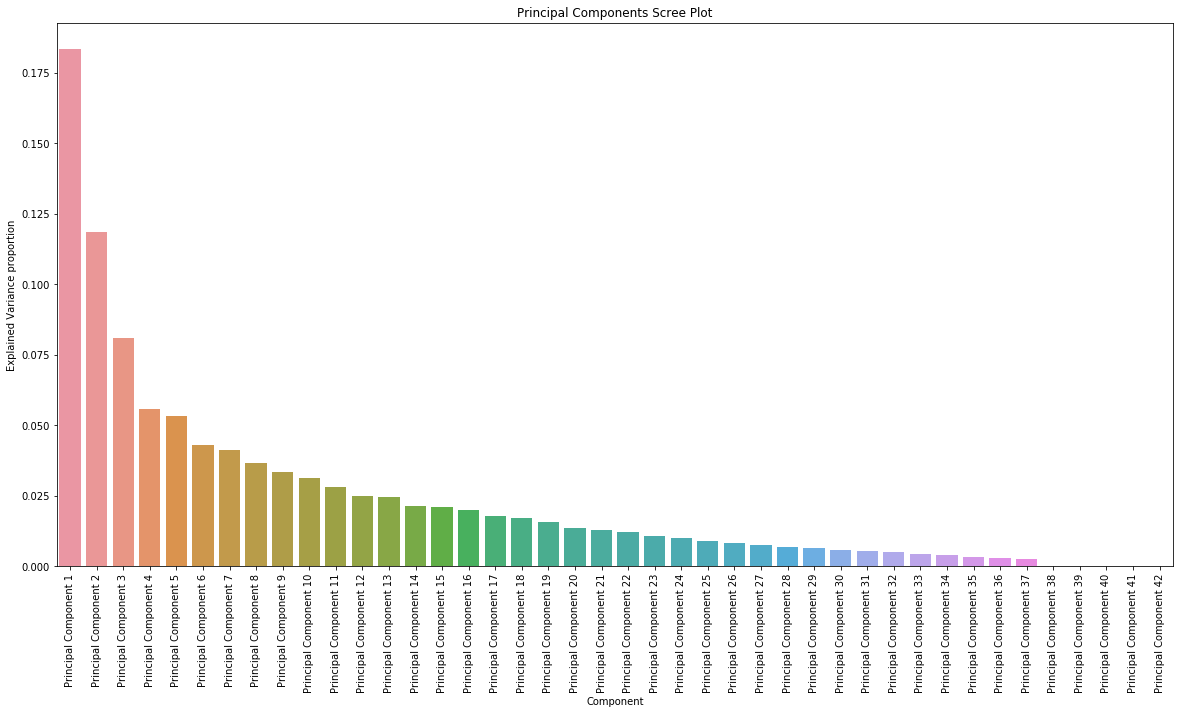

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(component_columns, pca.explained_variance_ratio_, ax=ax)
ax.set_title('Principal Components Scree Plot')
ax.set_xlabel('Component')
ax.set_xticklabels(component_columns, rotation=90)
ax.set_ylabel('Explained Variance proportion')

Include components explaining 99% of variance in model

In [27]:
total_explained_variance = 0
num_components = 0
while total_explained_variance < .75:
    total_explained_variance += pca.explained_variance_ratio_[num_components]
    num_components += 1

final_df = components_df.iloc[:,0:num_components]
final_df['Sales'] = scrubbed_df['Sales']
final_df.head()

/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Principal Component 11,Principal Component 12,Principal Component 13,Sales
0,-1.399997,-3.629700,-1.280948,2.591086,3.535069,0.113220,0.625602,-1.206688,-1.275047,0.909854,1.214496,-0.143115,1.911521,22927
1,-1.399997,-3.629700,-1.280948,2.591086,3.535069,0.113220,0.625602,-1.206688,-1.275047,0.909854,1.214496,-0.143115,1.911521,9302
2,1.267090,3.651525,-0.174674,0.284077,3.649634,-0.713132,0.206637,-0.086231,1.046709,0.921672,0.401932,0.574009,0.581690,171167
3,-0.837637,-2.315986,-1.317148,2.138287,-0.572237,0.790985,0.708363,-0.217907,0.067315,-0.169098,-1.540396,0.534975,0.747297,48484
4,0.597976,4.154396,0.129930,-1.020285,3.664275,0.206229,-1.687800,0.528386,0.397298,0.582843,0.896244,-2.035941,0.541584,97062


# Explore Data

In [28]:
final_df['Sales'].describe()

count       165.000000
mean      91168.266667
std      115206.409652
min        2097.000000
25%       20613.000000
50%       49647.000000
75%      113345.000000
max      909330.000000
Name: Sales, dtype: float64

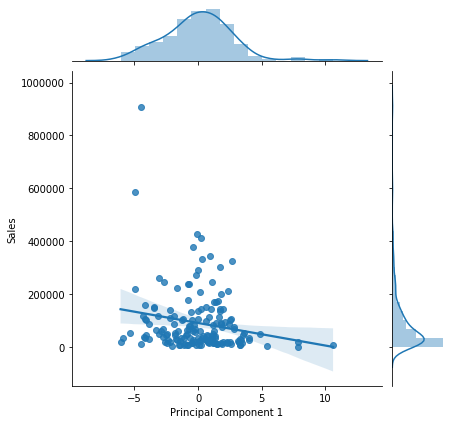

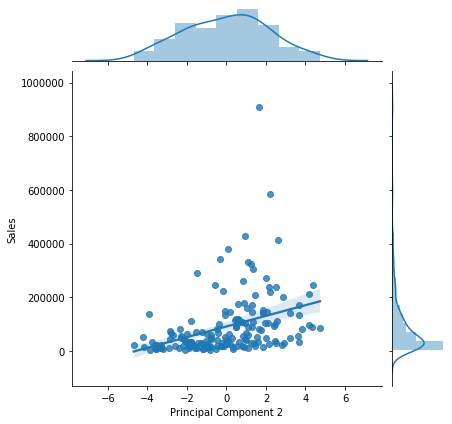

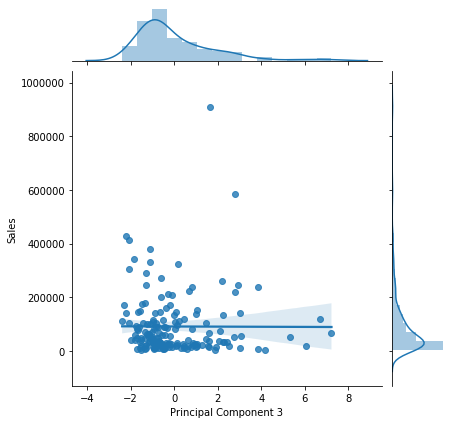

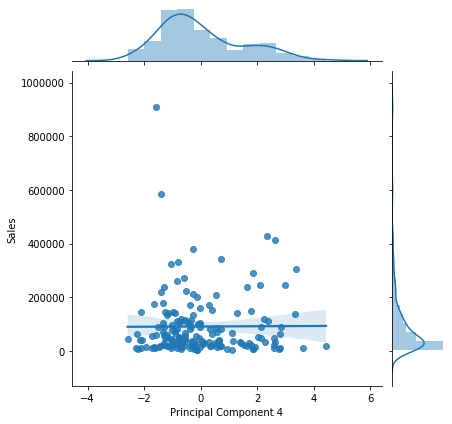

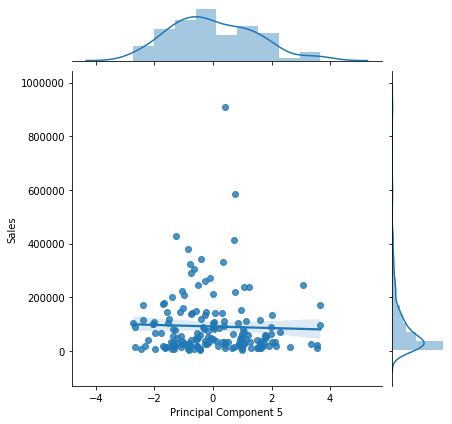

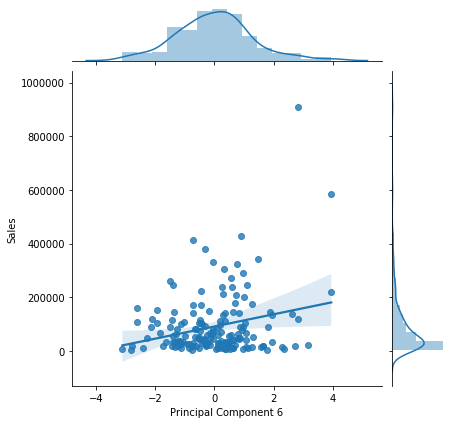

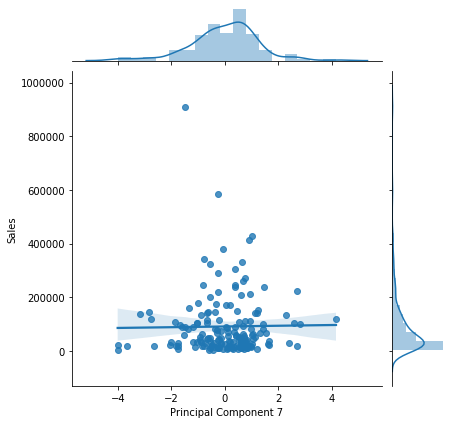

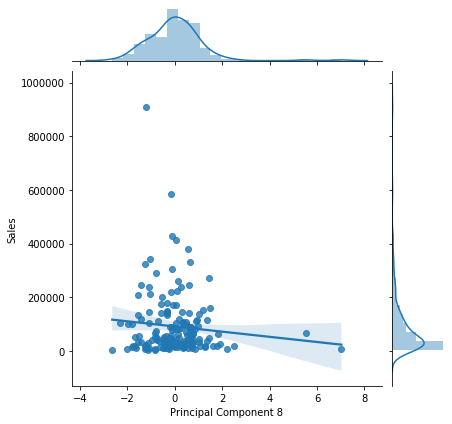

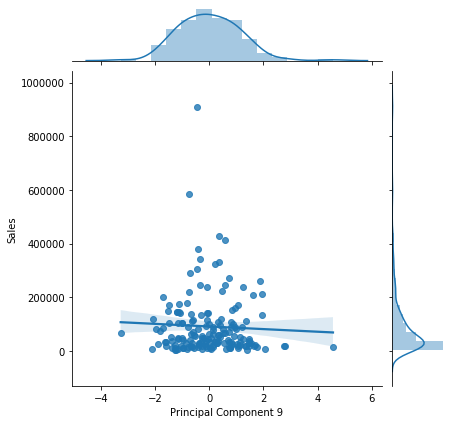

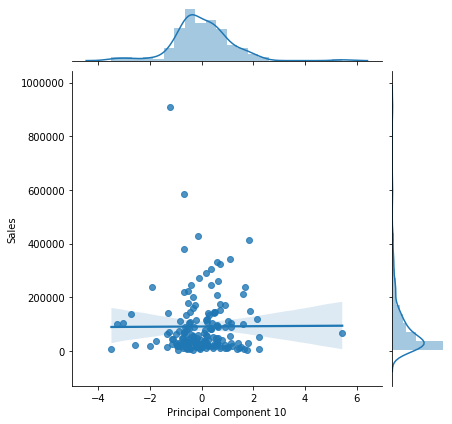

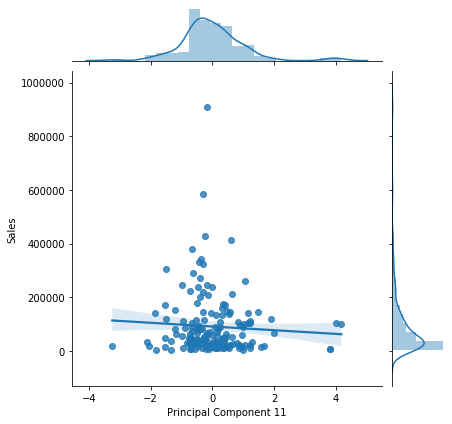

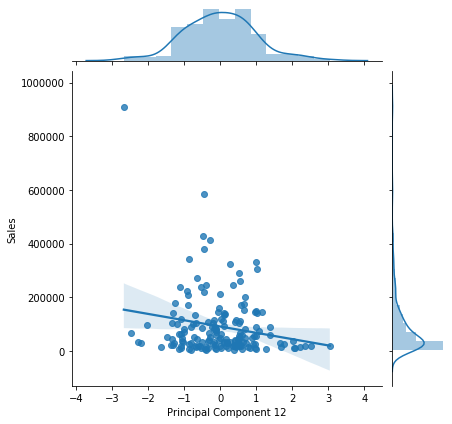

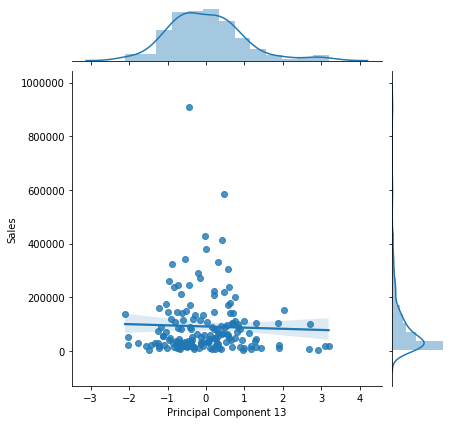

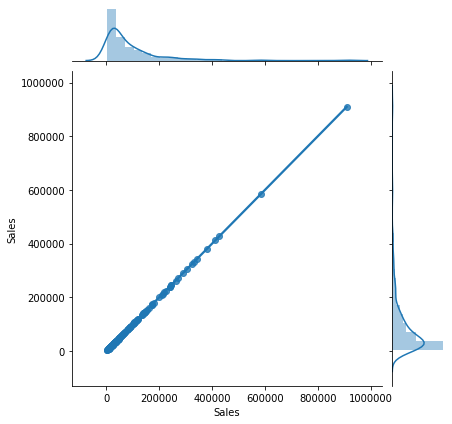

In [31]:
for col in final_df:
    sns.jointplot(x=col, y='Sales', data=final_df, kind='reg')

# Model Data

Create x and y variables

In [33]:
x = final_df.drop(columns='Sales')
y = final_df['Sales']

Perform train test split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=12)

Create baseline model

In [48]:
dr = DummyRegressor()
dr.fit(x_train, y_train)
y_train_pred_dr = dr.predict(x_train)
y_test_pred_dr = dr.predict(x_test)
print('Training RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred_dr)))
print('Training MAE', mean_absolute_error(y_train, y_train_pred_dr))
print('Test RMSE', np.sqrt(mean_squared_error(y_test, y_test_pred_dr)))
print('Test MAE', mean_absolute_error(y_test, y_test_pred_dr))

Training RMSE 114736.78522175759
Training MAE 74029.95571419128
Test RMSE 115209.35586682292
Test MAE 77514.74854819977


Fit Linear Regression Model

In [43]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_train_pred_lr = lr.predict(x_train)
y_test_pred_lr = lr.predict(x_test)
print('Training RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred_lr)))
print('Training MAE', mean_absolute_error(y_train, y_train_pred_lr))
print('Test RMSE', np.sqrt(mean_squared_error(y_test, y_test_pred_lr)))
print('Test MAE', mean_absolute_error(y_test, y_test_pred_lr))

Training RMSE 96810.89660832335
Training MAE 61223.98768413546
Test RMSE 103759.54950435748
Test MAE 79105.96410498473


Gridsearch SVR model

In [60]:
svr_param_dict = {'C': [x/10 for x in range(1500,6500,1000)] , 'epsilon': [x/100 for x in range(0, 20)], 
                    'degree': range(1,4)}
svr_gs_model = SVR()
svr_gs = GridSearchCV(svr_gs_model, svr_param_dict, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=5, verbose=1)
svr_gs.fit(x_train, y_train)
print('Best params:', svr_gs.best_params_)
print('Best estimator:', svr_gs.best_estimator_)
print('Best score: ', svr_gs.best_score_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.9s


Best params: {'C': 550.0, 'degree': 1, 'epsilon': 0.19}
Best estimator: SVR(C=550.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.19, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Best score:  -109086.0307768255


[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.1s finished


Fit best svr model

In [61]:
svr = SVR(C=550, epsilon=.19, degree=1)
svr.fit(x_train, y_train)
y_train_pred_svr = svr.predict(x_train)
y_test_pred_svr = svr.predict(x_test)
print('Training RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred_svr)))
print('Training MAE', mean_absolute_error(y_train, y_train_pred_svr))
print('Test RMSE', np.sqrt(mean_squared_error(y_test, y_test_pred_svr)))
print('Test MAE', mean_absolute_error(y_test, y_test_pred_svr))

Training RMSE 121368.82404697385
Training MAE 64730.014429795134
Test RMSE 122343.22318783589
Test MAE 71657.14710907725


Gridsearch adaboost

In [65]:
ab_param_dict = {'learning_rate': [x/1000 for x in range(0,100)]}
ab_gs_model = AdaBoostRegressor()
ab_gs = GridSearchCV(ab_gs_model, ab_param_dict, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=4, verbose=1)
ab_gs.fit(x_train, y_train)
print('Best params:', ab_gs.best_params_)
print('Best estimator:', ab_gs.best_estimator_)
print('Best score: ', ab_gs.best_score_)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   19.8s


Best params: {'learning_rate': 0.02}
Best estimator: AdaBoostRegressor(base_estimator=None, learning_rate=0.02, loss='linear',
                  n_estimators=50, random_state=None)
Best score:  -107113.65187136008


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   21.1s finished


Fit best ab model

In [66]:
ab = AdaBoostRegressor(learning_rate=.02)
ab.fit(x_train, y_train)
y_train_pred_ab = ab.predict(x_train)
y_test_pred_ab = ab.predict(x_test)
print('Training RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred_ab)))
print('Training MAE', mean_absolute_error(y_train, y_train_pred_ab))
print('Test RMSE', np.sqrt(mean_squared_error(y_test, y_test_pred_ab)))
print('Test MAE', mean_absolute_error(y_test, y_test_pred_ab))

Training RMSE 61295.08275981209
Training MAE 41984.39814106607
Test RMSE 109633.62278751608
Test MAE 64069.38919070329


,Reliability Score,Owner Satisfact Score,Acceleration Score,Zero To Sixty,Transmission Score,Fuel Economy Score,Overall Fuel Economy,City Fuel Economy,Highway Fuel Economy,Annual Fuel Cost,...,Height,Wheelbase,Turning Circle,Curb Weight,Max Load,Towing Capacity,Driving Satisfaction,Comfort Satisfaction,Value Satisfaction,Styling Satisfaction
0,5.000000,4.0,4.0,8.5,4.0,2.0,18.0,12.0,25.0,1620.0,...,68.0,118.0,43.0,4820.0,1160.0,4500.0,90.000000,81.000000,74.000000,84.000000
1,1.000000,2.0,5.0,6.0,5.0,2.0,20.0,12.0,32.0,1710.0,...,58.0,123.0,41.0,5170.0,870.0,0.0,68.000000,79.000000,46.000000,84.000000
2,1.000000,1.0,3.0,9.8,3.0,3.0,24.0,16.0,35.0,1190.0,...,65.0,104.0,38.0,3525.0,860.0,2000.0,41.000000,51.000000,51.000000,72.000000
3,5.000000,4.0,4.0,6.7,5.0,4.0,25.0,17.0,35.0,1155.0,...,57.0,111.0,40.0,3575.0,905.0,0.0,83.000000,84.000000,67.000000,81.000000
4,1.000000,1.0,3.0,9.9,3.0,3.0,24.0,16.0,32.0,1225.0,...,66.0,101.0,37.0,3360.0,985.0,2000.0,49.000000,41.000000,46.000000,67.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,3.000000,3.0,3.0,9.9,5.0,5.0,33.0,21.0,49.0,880.0,...,57.0,106.0,36.0,2865.0,850.0,0.0,62.000000,47.000000,85.000000,73.000000
185,3.479616,1.0,3.0,10.4,3.0,5.0,31.0,21.0,42.0,930.0,...,59.0,106.0,36.0,2865.0,860.0,0.0,63.874636,52.947722,72.452456,73.118647
186,5.000000,1.0,3.0,9.6,5.0,4.0,28.0,20.0,36.0,1030.0,...,61.0,101.0,36.0,2945.0,850.0,0.0,70.000000,44.000000,56.000000,85.000000
187,4.000000,3.0,4.0,7.5,5.0,2.0,20.0,13.0,28.0,1460.0,...,70.0,111.0,41.0,4280.0,1340.0,5000.0,71.000000,70.000000,59.000000,73.000000


In [79]:
scrubbed_df[['Reliability Score', 'Owner Satisfact Score']]

,Reliability Score,Owner Satisfact Score
0,5.000000,5.000000
1,1.000000,1.000000
2,1.000000,1.000000
3,5.000000,5.000000
4,1.000000,1.000000
...,...,...
184,3.000000,3.000000
185,3.252941,3.252941
186,5.000000,5.000000
187,4.000000,4.000000


In [8]:
df[df.isna().sum(axis=1)>30]

,Reliability Score,Owner Satisfact Score,Acceleration Score,Zero To Sixty,Transmission Score,Fuel Economy Score,Overall Fuel Economy,City Fuel Economy,Highway Fuel Economy,Annual Fuel Cost,...,Height,Wheelbase,Turning Circle,Curb Weight,Max Load,Towing Capacity,Driving Satisfaction,Comfort Satisfaction,Value Satisfaction,Styling Satisfaction


In [9]:
df.isna().sum(axis=1)

0       6
1      10
2       4
3       5
4       6
       ..
184     4
185    14
186     5
187     0
188     6
Length: 189, dtype: int64

In [20]:
test_df = pd.read_csv('Excel/data.csv')
test_df = test_df[test_df['Year']==2018]
test_df.reset_index(inplace=True, drop=True)

In [35]:
test_df['Annual Fuel Cost'].apply(lambda x: x.replace(',', '')).replace({'A':np.nan}).astype('float').describe()

count     184.000000
mean     1332.663043
std       343.849909
min       240.000000
25%      1113.750000
50%      1330.000000
75%      1560.000000
max      2210.000000
Name: Annual Fuel Cost, dtype: float64

In [49]:
test_df[test_df['Third Shoulder Room'].isna()==0][['Model','Third Shoulder Room','Third Leg Room','Third Head Room']]

,Model,Third Shoulder Room,Third Leg Room,Third Head Room
0,flex,50.0,28.0,2.0
10,tiguan,48.0,NaN,NaN
13,odyssey,59.0,29.5,4.0
27,rx-l,45.5,16.5,NaN
30,explorer,48.5,27.0,3.0
33,q7,50.0,26.5,1.0
37,highlander,53.0,21.0,1.5
40,sedona,59.0,27.5,2.0
42,tahoe,63.5,27.0,NaN
49,sorento,52.0,26.0,NaN


In [24]:
test_df['Fuel Capacity'].value_counts().iloc[0:10]

18.5    13
13.2    13
26.0     9
14.0     7
15.9     6
19.5     6
14.5     5
19.2     4
17.4     4
15.3     4
Name: Fuel Capacity, dtype: int64

In [12]:
scrubbed_df['IIHS Side Crash'].mean()

4.0